<a href="https://colab.research.google.com/github/loycatherine/cs3244/blob/master/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing the data


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
!pip install unidecode
import unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [0]:
set1 = pd.read_csv('../content/gdrive/My Drive/CS3244 Project/LSTM/detecting-insults-in-social-commentary/train.csv')
set1.drop("Date", 1, inplace=True)
set1["Comment"] = set1["Comment"].str.decode('unicode_escape')
print("Set 1:")
print(set1.count())

Set 1:
Insult     3947
Comment    3947
dtype: int64


In [0]:
set2 = pd.read_csv('../content/gdrive/My Drive/CS3244 Project/LSTM/detecting-insults-in-social-commentary/impermium_verification_labels.csv')
set2.drop("Date", 1, inplace=True)
set2.drop("Usage", 1, inplace=True)
set2.drop("id", 1, inplace=True)
set2["Comment"] = set2["Comment"].str.decode('unicode_escape')
print("Set 2:")
print(set2.count())

Set 2:
Insult     2235
Comment    2235
dtype: int64


In [0]:
set3 = pd.read_csv('../content/gdrive/My Drive/CS3244 Project/LSTM/jigsaw-toxic-comment-classification-challenge/train.csv')
set3.loc[(set3.toxic == 1) | (set3.severe_toxic == 1) | (set3.severe_toxic == 1) | (set3.obscene == 1) | (set3.threat == 1) | (set3.insult == 1) | (set3.identity_hate == 1), "Insult"] = 1
set3.loc[(set3.toxic == 0) & (set3.severe_toxic == 0) & (set3.severe_toxic == 0) & (set3.obscene == 0) & (set3.threat == 0) & (set3.insult == 0) & (set3.identity_hate == 0), "Insult"] = 0
set3.drop("toxic", 1, inplace=True)
set3.drop("severe_toxic", 1, inplace=True)
set3.drop("obscene", 1, inplace=True)
set3.drop("threat", 1, inplace=True)
set3.drop("insult", 1, inplace=True)
set3.drop("identity_hate", 1, inplace=True)
set3.drop("id", 1, inplace=True)
set3 = set3.rename(columns={"comment_text": "Comment"})
set3 = set3.astype({'Insult': 'int32'})
set3 = set3[['Insult', 'Comment']]
set3["Comment"] = set3["Comment"].str.replace("\n", " ")
print("Set 3:")
print(set3.count())

Set 3:
Insult     159571
Comment    159571
dtype: int64


In [0]:
set4 = pd.read_csv('../content/gdrive/My Drive/CS3244 Project/LSTM/detecting-insults-in-social-commentary/test_with_solutions.csv')
set4.drop("Date", 1, inplace=True)
set4.drop("Usage", 1 , inplace=True)
set4["Comment"] = set4["Comment"].str.replace(r"\\n", " ")
print("set 4:")
print(set4.count())

set 4:
Insult     2647
Comment    2647
dtype: int64


In [0]:
train = pd.concat([set1, set2, set3, set4])
train.drop_duplicates(inplace = True)

#Strip quotation marks, lowercase all
train["Comment"] = train["Comment"].str.strip('"').str.lower()
#Convert contractions
train["Comment"] = train["Comment"].str.replace("can't","can not")
train["Comment"] = train["Comment"].str.replace("you're","you are")
train["Comment"] = train["Comment"].str.replace("don't","do not")
train["Comment"] = train["Comment"].str.replace("i'm","i am")
#Remove punctuation and leftover encoding
train["Comment"] = train["Comment"].str.replace(r'\\xa0', ' ')
train["Comment"] = train["Comment"].str.replace(r'\\xc2', ' ')
train["Comment"] = train["Comment"].str.replace('[^\w\s]','')

print("train:")
print(train.count())

train:
Insult     168318
Comment    168318
dtype: int64


In [0]:
train.head(100)

,Insult,Comment
0,1,you fuck your dad
1,0,i really do not understand your point it seem...
2,0,a majority of canadians can and has been wron...
3,0,listen if you dont wanna get married to a man ...
4,0,các bạn xuống đường biểu tình 2011 có ôn hoà k...
...,...,...
95,1,correction bitch you do not think its superb b...
96,1,i think the only trickle that effected you was...
97,1,and you keep on your knees and keep telling yo...
98,0,what was that like 2000 words about nothing yo...


In [0]:
classification = ["Insult"]
train_values = train[classification].values
train_comments = train["Comment"]

from sklearn.model_selection import train_test_split

# Split the data
train_comments, test_comments, train_values, test_values = train_test_split(train_comments, train_values, test_size=0.3, shuffle= True)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_comments)
test_vectors = vectorizer.transform(test_comments)
print(train_vectors.shape, test_vectors.shape)

(117822, 205524) (50496, 205524)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

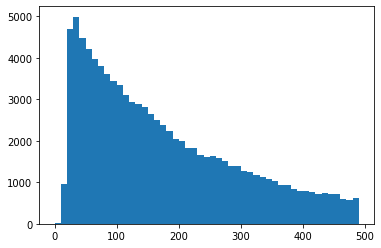

In [0]:
word_len = [len(comment) for comment in train_comments]
plt.hist(word_len, bins=np.arange(0,500,10))
plt.show()

## Train the Model

In [0]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix
#train_values = column_or_1d(train_values, warn=True)# 
clf = MultinomialNB(alpha = 0.008).fit(train_vectors, train_values.ravel())

In [0]:
from sklearn.metrics  import accuracy_score, precision_score, recall_score, f1_score
predicted = clf.predict(test_vectors)
print("Test accuracy: ", accuracy_score(test_values,predicted))
print("Test precision: ", precision_score(test_values,predicted))
print("Test recall: ", recall_score(test_values,predicted))
print("Test F1: ", f1_score(test_values,predicted))

Test accuracy:  0.9333610583016476
Test precision:  0.8195488721804511
Test recall:  0.5199646643109541
Test F1:  0.636255539941628
